# Claims inspection

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("approx-claims.csv")
all_claims = df[df["label"] != "NC"]
print(all_claims["label"].value_counts())

label
POS      134
FACT      28
PROSP      7
NEG        4
Name: count, dtype: int64


In [3]:
art_ids = list(df["doccano_art_id"].unique())
claims = [all_claims[all_claims["doccano_art_id"] == idx] for idx in art_ids]

In [4]:
claims[1]

,doccano_art_id,sentence_id,text,label
19,1,5,Experimental results on the United Nations Par...,POS
37,1,24,"To incorporate this intuition into our models,...",FACT
38,1,25,"In this way, the model will distinguish transl...",POS
66,1,68,To prevent the problem of the reduction of cov...,FACT
78,1,97,"From the results, we can see that the proposed...",POS
79,1,98,The exact matching method also outperforms the...,POS
81,1,100,"From this table, we can see that the exact mat...",POS
82,1,101,We can consider that it is one of the reasons ...,POS
88,1,111,7 From the results we see the tendency of NMT ...,POS
89,1,113,"In our setting, while bilingually trained NMT ...",POS


In [5]:
for s in claims[2].text.values:
    print(s)
    print()

We present a deep reinforcement learning architecture that represents the game state as a knowledge graph which is learned during exploration.

This graph is used to prune the action space, enabling more efficient exploration.

In experiments using the TextWorld framework, we show that our proposed technique can learn a control policy faster than baseline alternatives.

First, we show that a state representation in the form of a knowledge graph gives us the ability to effectively prune an action space.

Finally, we take initial steps toward framing the POMDP as a questionanswering (QA) problem wherein a knowledgegraph can be used to not only prune actions but to answer the question of what action is most appropriate.

We show how pre-training certain parts of our KG-DQN network using existing QA methods improves performance and allows knowledge to be transferred from different games.

Results show that incorporating a knowledge-graph into a reinforcement learning agent results in conve

In [6]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

#Compute embeddings
pos = claims[2]
pos = pos[pos["label"] == "POS"]
embeddings = model.encode(pos.text.values, convert_to_tensor=True)

c:\Users\cleme\Documents\STAGE\claims-in-NLP\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
for i, se1 in enumerate(embeddings):
    max_sim = 0
    most_sim = i
    for j, se2 in enumerate(embeddings):
        if i < j:
            sim = util.pytorch_cos_sim(se1, se2)
            if sim > max_sim:
                max_sim = sim
                most_sim = j
    print(pos.text.values[i])
    print(pos.text.values[most_sim])
    print(max_sim)
    print()

This graph is used to prune the action space, enabling more efficient exploration.
First, we show that a state representation in the form of a knowledge graph gives us the ability to effectively prune an action space.
tensor([[0.5855]])

In experiments using the TextWorld framework, we show that our proposed technique can learn a control policy faster than baseline alternatives.
Results show that incorporating a knowledge-graph into a reinforcement learning agent results in converges to the highest reward more than 40% faster than the best baseline.
tensor([[0.4569]])

First, we show that a state representation in the form of a knowledge graph gives us the ability to effectively prune an action space.
Action pruning using the knowledge graph and pre-training of the embeddings used in the deep Q-network result in shorter action sequences needed to complete quests.
tensor([[0.6352]])

We show how pre-training certain parts of our KG-DQN network using existing QA methods improves performa

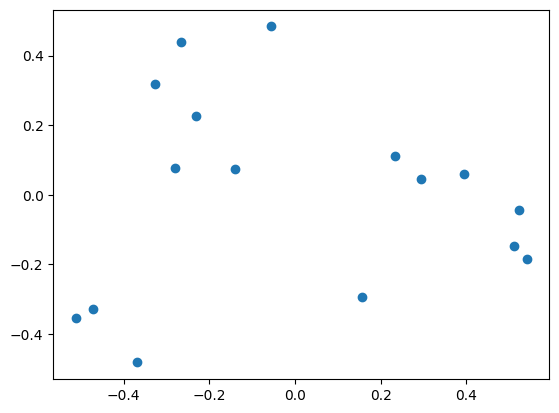

In [7]:
from sklearn.decomposition import PCA

# perform PCA on our embeddings for visualization
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings)

import matplotlib.pyplot as plt

# plot the embeddings
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1])
plt.show()

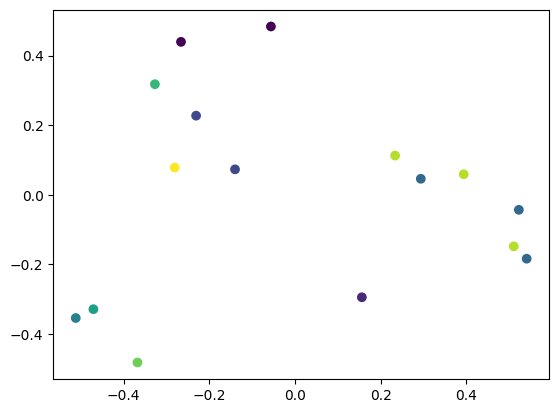

In [15]:
from sklearn.cluster import KMeans 

k = 10
km = KMeans(n_clusters = k)
km.fit(embeddings)

# get the cluster labels
cluster_labels = km.labels_

# plot the embeddings with the cluster labels
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=cluster_labels)
plt.show()

In [16]:
# for each cluster, print the sentences
for i in range(k):
    print(f"Cluster {i}")
    for j, label in enumerate(cluster_labels):
        if label == i:
            print(pos.text.values[j])
            print()
    print()

Cluster 0
With pre-training using a questionanswering paradigm, we achieve this fast convergence rate while also achieving high quality quest solutions as measured by the number of steps required to complete the quests.

From these results, we conclude that the pre-training using our questionanswering paradigm is allowing the agent to find a general understanding of how to pick good actions even when the agent has never seen the final


Cluster 1
Since all versions of KG-DQN converge at approximately the same rate, we conclude that the knowledge graph-i.e., persistent memory-is the main factor helping convergence time since it is the common element across all experiments.


Cluster 2
We have shown that incorporating knowledge graphs into an deep Q-network can reduce training time for agents playing text-adventure games of various lengths.

Action pruning using the knowledge graph and pre-training of the embeddings used in the deep Q-network result in shorter action sequences needed to 

In [20]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
for i, s1 in enumerate(claims[1].text.values):
    for j, s2 in enumerate(claims[1].text.values):
        if i < j:
            scores = scorer.score(s1, s2)
            if scores["rouge1"].fmeasure > 0.4:
                print(s1)
                print(s2)
                print(scores)
                print()

To prevent the problem of the reduction of coverage in the exact matching method, we also propose a partial matching method that keeps coverage just like standard triangulation by allowing connection of incompletely equivalent pivot subtrees.
From the results, we can see that the proposed partial matching method of pivot subtrees in triangulation outperforms the standard triangulation method for all language pairs and achieves higher or almost equal scores than proposed exact matching method.
{'rouge1': Score(precision=0.47368421052631576, recall=0.5, fmeasure=0.4864864864864865), 'rouge2': Score(precision=0.16216216216216217, recall=0.17142857142857143, fmeasure=0.16666666666666669), 'rougeL': Score(precision=0.23684210526315788, recall=0.25, fmeasure=0.24324324324324326)}

To prevent the problem of the reduction of coverage in the exact matching method, we also propose a partial matching method that keeps coverage just like standard triangulation by allowing connection of incompletel